# Kaylees new toy: Using Amazon data to recommend a new toy for my daughter


Author: Deja Prade

# Overview

In this project, I build a toy recommendation system using the amazon e-commerce data. I develop a content-based recommendation model using NLP and cosine similarity and a collaborative-based model using SVD.

# Business understanding

Kaylee (my stakeholder/daughter) is a one year old whom is pretty spoiled. Of course we do things the old-fashion way and pick out random toys in local stores but since starting the Flatiron Data Science program I haven't had much time for that. I wanted to develop a toy recommendation system to balance out school and mom life.

# Import Libraries

In [1]:
# Libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
!pip install rake_nltk
import nltk
from rake_nltk import Rake
nltk.download('punkt')
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import sklearn
from sklearn.decomposition import TruncatedSVD

[nltk_data] Downloading package punkt to /Users/deja/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load Data

The Amazon e-commerce data I used is originally from prompt cloud but I got a smaller version from kaggle. the data includes 10000 toy products, spanning from toy vehicles to balloons to educational toys and dolls.

In [2]:
# Store data in DataFrame
df= pd.read_csv('amazon_co-ecommerce_sample.csv')
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop R

In [3]:
#information about the index dtype ,column dtypes, non-null values and memory usage 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [4]:
#display number of unique values in each column
df.nunique()

uniq_id                                        10000
product_name                                    9964
manufacturer                                    2651
price                                           2625
number_available_in_stock                         89
number_of_reviews                                194
number_of_answered_questions                      19
average_review_rating                             19
amazon_category_and_sub_category                 255
customers_who_bought_this_item_also_bought      8755
description                                     8514
product_information                             9939
product_description                             8514
items_customers_buy_after_viewing_this_item     6749
customer_questions_and_answers                   910
customer_reviews                                9901
sellers                                         6581
dtype: int64

In [5]:
# type of entries, how many missing values/null fields
df.info()
print('\nMissing values:  ', df.isnull().sum().values.sum())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

In [6]:
#drop customer_questions_and_answers
df = df.drop(['customer_questions_and_answers'], axis=1) 

In [7]:
#fill null number_of_answered_questions with 0
df.number_of_answered_questions=df.number_of_answered_questions.fillna(0)

In [8]:
 #removing £ from values 
df['price'] = df['price'].replace({'\£':''}, regex = True)
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g P

In [9]:
df['price'] = df['price'].replace({'\,':''}, regex = True)
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g P

In [10]:
#take out hyphen and everything after
df['price'] = df['price'].str.split('-').str[0]

In [11]:
#converting from string to float
df['price'] = df['price'].astype(float)

In [12]:
#checking for conversion done
df.price.dtype

dtype('float64')

In [13]:
#check for missing values
df.price.isnull().any()

True

In [14]:
#fill missing values with 0
meanprice = np.mean(df.price)
df.price = df.price.fillna(meanprice)

In [15]:
#verify values were filled
df.price.isnull().any()

False

In [16]:
#display price stats
df.price.describe()

count    10000.000000
mean        20.278110
std         42.891195
min          0.010000
25%          5.950000
50%         12.990000
75%         20.278110
max       2439.920000
Name: price, dtype: float64

<AxesSubplot:>

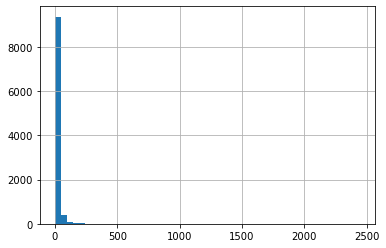

In [17]:
df['price'].hist(bins=50)

In [18]:
#combining because they both hold description data 
df['description_of_product']=df[['description', 'product_description']].apply(lambda x: ''.join(str(x)), axis=1)

In [19]:
df['description_of_product'].drop_duplicates()

0       description            Product Description Hor...
1       description            Size Name:Large FunkyBu...
2       description            BIG CLASSIC TOY TRAIN S...
3       description            Hornby 00 Gauge BR Hawk...
4       description            Product Description Hor...
                              ...                        
9995    description            DC 66 Batman Classic TV...
9996    description            NaN\nproduct_descriptio...
9997    description            *Includes 1x Badge with...
9998    description            Designed by Ed BenesIt'...
9999    description            NaN\nproduct_descriptio...
Name: description_of_product, Length: 10000, dtype: object

In [20]:
df = df.drop(['description','product_description'], axis=1)

In [21]:
df.description_of_product.isnull().sum()

0

In [22]:
#make number_of_reviews numerical & take out commas in numbers
def mapnumber_of_reviews(v): 
    if pd.isnull(v):
        return 0
    try:
        vv = v.replace(",","")
        return int(vv)
    except ValueError:
        return 0

In [23]:
if df['number_of_reviews'].dtype != 'int64':  
    df['number_of_reviews'] = df['number_of_reviews'].map(mapnumber_of_reviews)

In [24]:
#make rating numerical
def mapaverage_review_rating(v): 
    if pd.isnull(v):
        return 0
    try:
        vv = v.split('out')[0][0].strip()
        return float(vv)
    except ValueError:        
        return 0  

In [25]:
if df['average_review_rating'].dtype != 'float64':
    df['average_review_rating'] = df['average_review_rating'].map(mapaverage_review_rating)

In [26]:
df['average_review_rating']

0       4.0
1       4.0
2       3.0
3       5.0
4       4.0
       ... 
9995    5.0
9996    4.0
9997    5.0
9998    5.0
9999    4.0
Name: average_review_rating, Length: 10000, dtype: float64

In [27]:
#Splitting number_available_in_stock into two columns number_available and number_available_status
stock = pd.DataFrame(df.number_available_in_stock.astype(str).str.split('\xa0',1).tolist(),
                                   columns = ['number_available','number_availability_status'])

In [28]:
#checking for the split in columns
stock

,number_available,number_availability_status
0,5,new
1,nan,None
2,2,new
3,nan,None
4,nan,None
...,...,...
9995,5,new
9996,nan,None
9997,3,new
9998,3,new


In [29]:
#combine dataframes
df = pd.concat([df, stock], axis=1, ignore_index=False)

In [30]:
#check concatenation
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'product_information',
       'items_customers_buy_after_viewing_this_item', 'customer_reviews',
       'sellers', 'description_of_product', 'number_available',
       'number_availability_status'],
      dtype='object')

In [31]:
 #dropping column number_available_in_stock
df.drop(['number_available_in_stock'],axis=1, inplace=True)

In [32]:
#checking for drop
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'product_information',
       'items_customers_buy_after_viewing_this_item', 'customer_reviews',
       'sellers', 'description_of_product', 'number_available',
       'number_availability_status'],
      dtype='object')

In [33]:
#make number_available a float
df['number_available']=df['number_available'].astype(float)

In [34]:
#check for null values in number_available
df.number_available.isnull()

0       False
1        True
2       False
3        True
4        True
        ...  
9995    False
9996     True
9997    False
9998    False
9999    False
Name: number_available, Length: 10000, dtype: bool

In [35]:
#fill null in number_available with 0
df['number_available'] = df.number_available.fillna(0)

In [36]:
df=df.fillna('')

In [37]:
#verify theres no null values
df.isnull().sum()

uniq_id                                        0
product_name                                   0
manufacturer                                   0
price                                          0
number_of_reviews                              0
number_of_answered_questions                   0
average_review_rating                          0
amazon_category_and_sub_category               0
customers_who_bought_this_item_also_bought     0
product_information                            0
items_customers_buy_after_viewing_this_item    0
customer_reviews                               0
sellers                                        0
description_of_product                         0
number_available                               0
number_availability_status                     0
dtype: int64

In [38]:
#verify data types are as wanted
df.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                          float64
number_of_reviews                                int64
number_of_answered_questions                   float64
average_review_rating                          float64
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
product_information                             object
items_customers_buy_after_viewing_this_item     object
customer_reviews                                object
sellers                                         object
description_of_product                          object
number_available                               float64
number_availability_status                      object
dtype: object

In [39]:
# summary statistics for all numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,10000.0,20.27811,42.891195,0.01,5.95,12.99,20.27811,2439.92
number_of_reviews,10000.0,9.12350,33.700000,0.00,1.00,2.00,6.00000,1399.00
number_of_answered_questions,10000.0,1.69460,2.467740,0.00,1.00,1.00,2.00000,39.00
average_review_rating,10000.0,4.50460,0.539081,0.00,4.00,5.00,5.00000,5.00
number_available,10000.0,5.93770,8.361077,0.00,0.75,3.00,7.00000,92.00


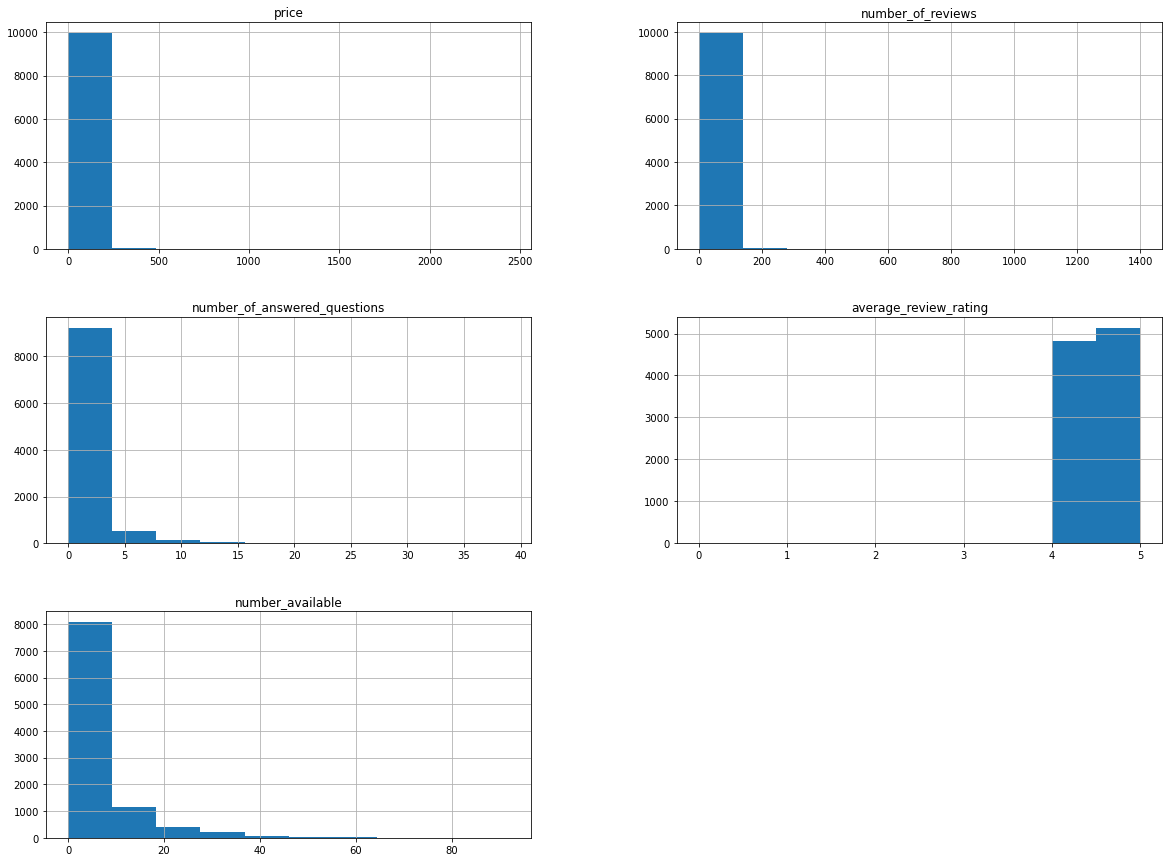

In [40]:
df.hist(figsize=(20, 15))
plt.show()

In [41]:
#split amazon_category_and_sub_category by delimeter to create sub categories
print(df.amazon_category_and_sub_category[1])
print('\n')

for i in df.amazon_category_and_sub_category[1].split('>'):
    print(i)

Hobbies > Model Trains & Railway Sets > Rail Vehicles > Trains


Hobbies 
 Model Trains & Railway Sets 
 Rail Vehicles 
 Trains


In [42]:
df.amazon_category_and_sub_category[7].split('>')[1][1:]

'Model Trains & Railway Sets '

In [43]:
MainCategory = df['amazon_category_and_sub_category'].str.split('>',1).str[0]

In [44]:
print('Top Ten Main Categories.\n')
print(MainCategory.value_counts()[:10]) 

Top Ten Main Categories.

Hobbies                     1464
Die-Cast & Toy Vehicles     1221
Figures & Playsets          1111
Characters & Brands          960
Games                        941
Arts & Crafts                802
Party Supplies               694
                             690
Fancy Dress                  585
Sports Toys & Outdoor        372
Name: amazon_category_and_sub_category, dtype: int64


In [45]:
MainCategory

0                     Hobbies 
1                     Hobbies 
2                     Hobbies 
3                     Hobbies 
4                     Hobbies 
                 ...          
9995                  Hobbies 
9996      Characters & Brands 
9997    Novelty & Special Use 
9998                  Hobbies 
9999      Characters & Brands 
Name: amazon_category_and_sub_category, Length: 10000, dtype: object

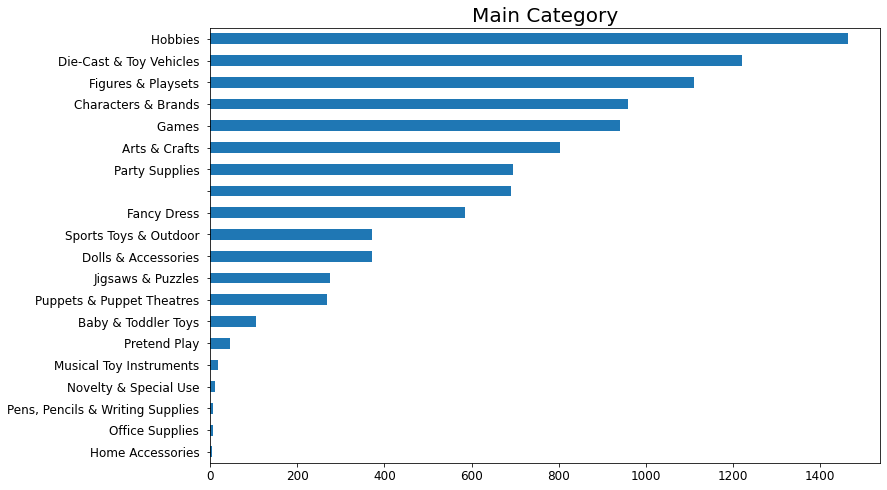

In [46]:
plt.figure(figsize=(12,8))
MainCategory.value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Main Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [47]:
SecondaryCategory = df['amazon_category_and_sub_category'].str.split('>',2).str[1]

In [48]:
print('Top Ten Sub Categories.\n')
print(SecondaryCategory.value_counts()[:10]) 

Top Ten Sub Categories.

 Toy Vehicles & Accessories       1100
 Science Fiction & Fantasy         485
 Accessories                       388
 Model Trains & Railway Sets       386
 Trading Cards & Accessories       376
 Children's Craft Kits             369
 Disney                            347
 Banners, Stickers & Confetti      335
 Decorations                       317
 Dice & Dice Games                 298
Name: amazon_category_and_sub_category, dtype: int64


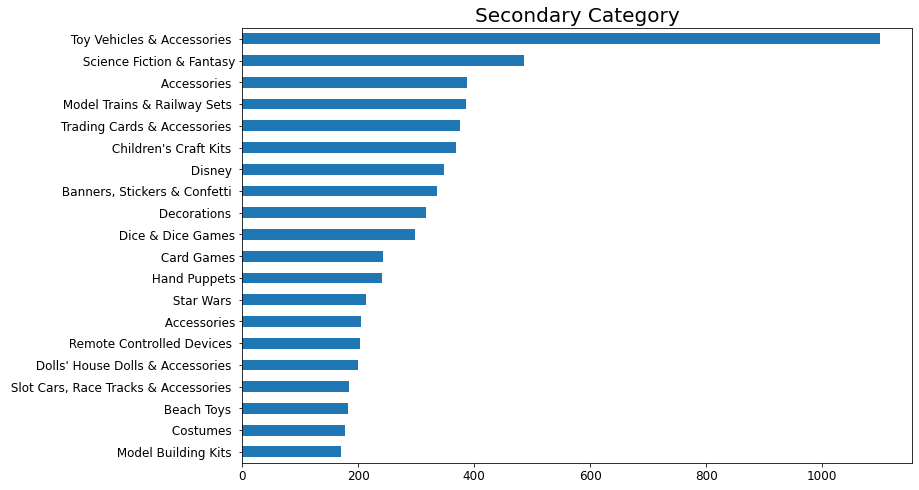

In [49]:
plt.figure(figsize=(12,8))
SecondaryCategory.value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Secondary Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [50]:
TertiaryCategory= df['amazon_category_and_sub_category'].str.split('>',3).str[2]

In [51]:
print('Top Ten Tertiary Categories.\n')
print(TertiaryCategory.value_counts()[:10]) 

Top Ten Tertiary Categories.

 Scaled Models                  912
 Toys                           623
 Bead Art & Jewellery-Making    368
 Packs & Sets                   317
 Balloons                       293
 Banners                        278
 Rail Vehicles                  264
 Masks                          188
 Dolls' House Accessories       172
 Adults                         169
Name: amazon_category_and_sub_category, dtype: int64


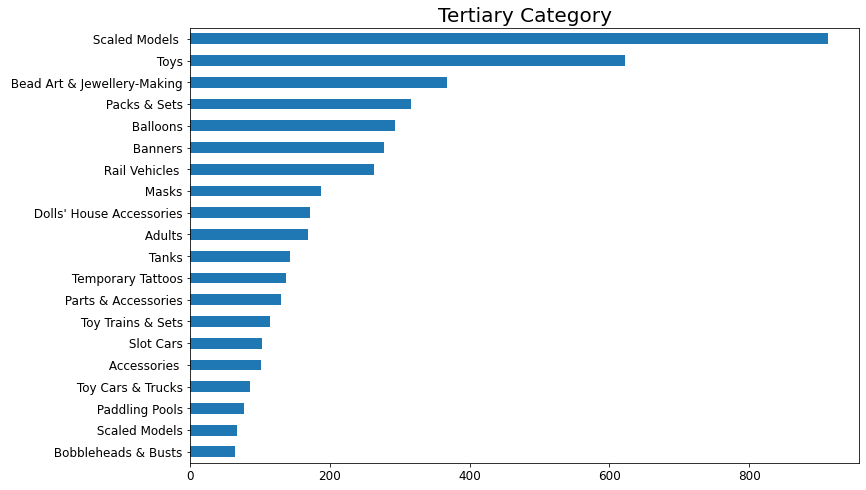

In [52]:
plt.figure(figsize=(12,8))
TertiaryCategory.value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Tertiary Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [53]:
QuaternaryCategory = df['amazon_category_and_sub_category'].str.split('>',4).str[3]

In [54]:
print('Top Ten Quaternary Categories.\n')             
print(QuaternaryCategory.value_counts()[:10])

Top Ten Quaternary Categories.

 Vehicles                       880
 Trains                         176
 Locomotives                     88
 Figures & Decoration Parts      43
 Landscaping                     42
 Sleeves                         32
 Boats                           18
 Signal & Sound                  13
 Buttons & Pins                  10
 Albums                           9
Name: amazon_category_and_sub_category, dtype: int64


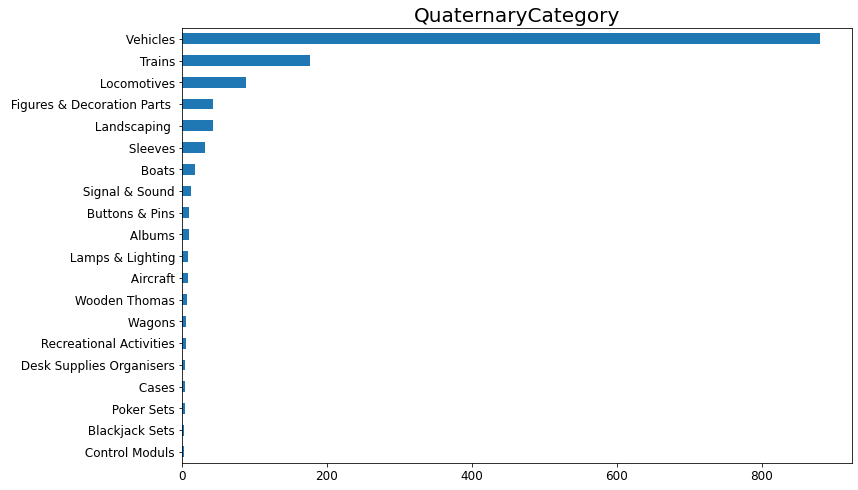

In [55]:
plt.figure(figsize=(12,8))
QuaternaryCategory.value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('QuaternaryCategory',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

<AxesSubplot:xlabel='average_review_rating', ylabel='number_of_reviews'>

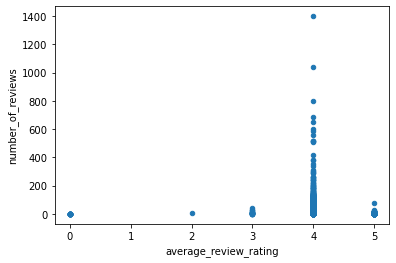

In [56]:
df.plot(kind='scatter', x='average_review_rating', y='number_of_reviews')

Scatter plot between number_of_reviews and average_review_rating having ratings maximum between 4-5 out of 5 which indicates that products sold are good in quality and preferred for purchase by customers.

# Modeling

### Content based filtering using cosine similarity

In [57]:
#making a new dataframe with only text data
data = df[['product_name','manufacturer','amazon_category_and_sub_category','product_information','customer_reviews','description_of_product']]
data

,product_name,manufacturer,amazon_category_and_sub_category,product_information,customer_reviews,description_of_product
0,Hornby 2014 Catalogue,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Worth Buying For The Pictures Alone (As Ever) ...,description Product Description Hor...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,description Size Name:Large FunkyBu...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,description BIG CLASSIC TOY TRAIN S...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight259 g Product Dim...,I love it // 5.0 // 22 July 2013 // By\n \n...,description Hornby 00 Gauge BR Hawk...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight159 g Product Dim...,Birthday present // 5.0 // 14 April 2014 // By...,description Product Description Hor...
...,...,...,...,...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,Hobbies > Collectible Figures & Memorabilia > ...,Technical Details Item Weight136 g Product Dim...,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,description DC 66 Batman Classic TV...
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,Characters & Brands > Star Wars > Toys,Technical Details Additional Information AS...,... what I see my grandson us going to have fu...,description NaN\nproduct_descriptio...
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,Novelty & Special Use > Novelty > Accessories ...,Technical Details Item Weight159 g Product Dim...,Five Stars // 5.0 // 18 Dec. 2015 // By\n \...,description *Includes 1x Badge with...
9998,Justice League of America Series 3 Green Lante...,DC Comics,Hobbies > Collectible Figures & Memorabilia > ...,Technical Details Item Weight181 g Product Dim...,The best sculpt in a while // 5.0 // 13 May 20...,description Designed by Ed BenesIt'...


In [58]:
# to remove punctuations from description_of_product
data['description_of_product'] = data['description_of_product'].str.replace('[^\w\s]','')

In [59]:
# to extract key words from description_of_product to a list 
data['Key_words'] = '' 

# use Rake to discard stop words (based on english stopwords from NLTK)
r = Rake() 

# to extract key words from description_of_product &get dictionary with key words and their scores
for index, row in data.iterrows():
    r.extract_keywords_from_text(row['description_of_product']) 
    key_words_dict_scores = r.get_word_degrees()    
    row['Key_words'] = list(key_words_dict_scores.keys())  

data

,product_name,manufacturer,amazon_category_and_sub_category,product_information,customer_reviews,description_of_product,Key_words
0,Hornby 2014 Catalogue,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Worth Buying For The Pictures Alone (As Ever) ...,description Product Description Hor...,"[description, product, hornby, 2014, catalogue..."
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,description Size NameLarge FunkyBuy...,"[description, size, namelarge, funkybuys, larg..."
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,description BIG CLASSIC TOY TRAIN S...,"[description, big, classic, toy, train, set, t..."
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight259 g Product Dim...,I love it // 5.0 // 22 July 2013 // By\n \n...,description Hornby 00 Gauge BR Hawk...,"[description, hornby, 00, gauge, br, hawkswort..."
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight159 g Product Dim...,Birthday present // 5.0 // 14 April 2014 // By...,description Product Description Hor...,"[description, product, hornby, railroad, 040, ..."
...,...,...,...,...,...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,Hobbies > Collectible Figures & Memorabilia > ...,Technical Details Item Weight136 g Product Dim...,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,description DC 66 Batman Classic TV...,"[description, dc, 66, batman, classic, tv, ser..."
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,Characters & Brands > Star Wars > Toys,Technical Details Additional Information AS...,... what I see my grandson us going to have fu...,description NaN\nproduct_descriptio...,"[description, nan, product_description, name, ..."
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,Novelty & Special Use > Novelty > Accessories ...,Technical Details Item Weight159 g Product Dim...,Five Stars // 5.0 // 18 Dec. 2015 // By\n \...,description Includes 1x Badge with ...,"[description, includes, 1x, badge, holder, cha..."
9998,Justice League of America Series 3 Green Lante...,DC Comics,Hobbies > Collectible Figures & Memorabilia > ...,Technical Details Item Weight181 g Product Dim...,The best sculpt in a while // 5.0 // 13 May 20...,description Designed by Ed BenesIts...,"[description, designed, ed, benesits, third, s..."


In [60]:
# to see last item in description_of_product
data['description_of_product'][9999]

'description            NaN\nproduct_description    NaN\nName 9999 dtype object'

In [61]:
# to see last dictionary extracted from description_of_product
key_words_dict_scores

defaultdict(<function rake_nltk.rake.Rake._build_word_co_occurance_graph.<locals>.<lambda>()>,
            {'description': 8,
             'nan': 16,
             'product_description': 8,
             'name': 8,
             '9999': 8,
             'dtype': 8,
             'object': 8})

In [62]:
data['Key_words'][9999]

['description',
 'nan',
 'product_description',
 'name',
 '9999',
 'dtype',
 'object']

In [63]:
data.columns

Index(['product_name', 'manufacturer', 'amazon_category_and_sub_category',
       'product_information', 'customer_reviews', 'description_of_product',
       'Key_words'],
      dtype='object')

In [64]:
# to extract columns into a list
data['customer_reviews'] = data['customer_reviews'].map(lambda x: x.split('//'))
data['amazon_category_and_sub_category'] = data['amazon_category_and_sub_category'].map(lambda x: x.split('>')[:3])


# convert to lowercase 
for index, row in df.iterrows():
    row['customer_reviews'] = [x.lower().replace(' ','') for x in row['customer_reviews']]
    row['amazon_category_and_sub_category'] = [x.lower().replace(' ','') for x in row['amazon_category_and_sub_category']]
    row['manufacturer'] = [x.lower().replace(' ','') for x in row['manufacturer']]
data_clean=data

In [65]:
data_clean.head()

,product_name,manufacturer,amazon_category_and_sub_category,product_information,customer_reviews,description_of_product,Key_words
0,Hornby 2014 Catalogue,Hornby,"[Hobbies , Model Trains & Railway Sets , Rai...",Technical Details Item Weight640 g Product Dim...,[Worth Buying For The Pictures Alone (As Ever)...,description Product Description Hor...,"[description, product, hornby, 2014, catalogue..."
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,"[Hobbies , Model Trains & Railway Sets , Rai...",Technical Details Manufacturer recommended age...,"[Four Stars , 4.0 , 18 Dec. 2015 , By\n ...",description Size NameLarge FunkyBuy...,"[description, size, namelarge, funkybuys, larg..."
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,"[Hobbies , Model Trains & Railway Sets , Rai...",Technical Details Manufacturer recommended age...,"[**Highly Recommended!** , 5.0 , 26 May 2015...",description BIG CLASSIC TOY TRAIN S...,"[description, big, classic, toy, train, set, t..."
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,"[Hobbies , Model Trains & Railway Sets , Rai...",Technical Details Item Weight259 g Product Dim...,"[I love it , 5.0 , 22 July 2013 , By\n \...",description Hornby 00 Gauge BR Hawk...,"[description, hornby, 00, gauge, br, hawkswort..."
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,"[Hobbies , Model Trains & Railway Sets , Rai...",Technical Details Item Weight159 g Product Dim...,"[Birthday present , 5.0 , 14 April 2014 , B...",description Product Description Hor...,"[description, product, hornby, railroad, 040, ..."


In [66]:
# to combine 3 columns of key words into 1 list under Bag_of_words column
data_clean['Bag_of_words'] = ''
columns = ['amazon_category_and_sub_category', 'customer_reviews','Key_words']

for index, row in data_clean.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    row['Bag_of_words'] = words
    
# strip white spaces infront and behind, replace multiple whitespaces 
data_clean['Bag_of_words'] = data_clean['Bag_of_words'].str.strip().str.replace('   ', ' ').str.replace('  ', ' ')

data_bag = data_clean[['product_name','Bag_of_words']]
data_bag

,product_name,Bag_of_words
0,Hornby 2014 Catalogue,Hobbies Model Trains & Railway Sets Rail Vehic...
1,FunkyBuys® Large Christmas Holiday Express Fes...,Hobbies Model Trains & Railway Sets Rail Vehic...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,Hobbies Model Trains & Railway Sets Rail Vehic...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hobbies Model Trains & Railway Sets Rail Vehic...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hobbies Model Trains & Railway Sets Rail Vehic...
...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,Hobbies Collectible Figures & Memorabilia Coll...
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Characters & Brands Star Wars Toys ... what I ...
9997,Defiance Lawkeeper Metal Badge Prop Replica,Novelty & Special Use Novelty Accessories Five...
9998,Justice League of America Series 3 Green Lante...,Hobbies Collectible Figures & Memorabilia Coll...


In [67]:
# an example to see what is in the Bag_of_words
data_bag['Bag_of_words'][0]

"Hobbies Model Trains & Railway Sets Rail Vehicles Worth Buying For The Pictures Alone (As Ever) 4.0 6 April 2014 By\n \n Copnovelist\n \n on 6 April 2014 Part of the magic for me growing up as a boy was to buy (or be given) the new Hornby catalogue every year, even if it included 90% of the same products as the previous year. I've still got my old ones dating back to the 70s and 80s somewhere. These days the catalogue is especially informative in that it tells you the vintage of the rolling stock which is useful if you are dedicating your railway to one particular era and train company. | Amazing detail fabulous photography. 5.0 11 April 2015 By\n \n richard\n \n on 11 April 2015 Amazing detail, every credit to the photographer in this book, a worthy reference manual, as well as a sales brochure. even if you only have a passing interest in the hobby you will be transported to another time when we were all younger and in awe of the big trains. | 'Great Purchase' 5.0 23 April 2014 By\n 

The recommender model can only read and compare a matrix with another, so we need to convert the 'Bag_of_words' into vector representation using CountVectorizer, which is a simple frequency counter for each word in the bag_of_words column. Once I have the matrix containing the count for each word, I can apply the cosine_similarity function to compare similarities between products

In [68]:
# to generate the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(data_bag['Bag_of_words'])
count_matrix

<10000x53371 sparse matrix of type '<class 'numpy.int64'>'
	with 946985 stored elements in Compressed Sparse Row format>

In [69]:
# to generate the cosine similarity matrix (size 10000 x 10000)
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.28437067 0.59921348 ... 0.19036341 0.55314879 0.6053067 ]
 [0.28437067 1.         0.33900076 ... 0.4417261  0.158104   0.30064334]
 [0.59921348 0.33900076 1.         ... 0.25376716 0.48753156 0.60325112]
 ...
 [0.19036341 0.4417261  0.25376716 ... 1.         0.0628548  0.13024812]
 [0.55314879 0.158104   0.48753156 ... 0.0628548  1.         0.59151056]
 [0.6053067  0.30064334 0.60325112 ... 0.13024812 0.59151056 1.        ]]


 Cosine similarity: similarity = cos(angle) = range from 0 (different) to 1 (similar).
 All the numbers on the diagonal are 1 because every product is identical to itself (cosine value is 1 means exactly identical).
 Matrix is also symmetrical because the similarity between A and B is the same as the similarity between B and A.
 For other values eg 0.6053067, movie x and movie y has similarity value of 0.6053067.

In [70]:
# to create a Series for product_name which can be used as indices (each index is mapped to a product name)
indices = pd.Series(data_bag['product_name'])
indices[:5]

0                                Hornby 2014 Catalogue
1    FunkyBuys® Large Christmas Holiday Express Fes...
2    CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...
3       HORNBY Coach R4410A BR Hawksworth Corridor 3rd
4    Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...
Name: product_name, dtype: object

In [71]:
# this function takes in a product name as input and returns the top 10 recommended (similar) products
def recommend(product_name, cosine_sim = cosine_sim):
    recommended_toys = []
    idx = indices[indices == product_name].index[0]   # to get the index of the toy matching the input toy
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)   # similarity scores in descending order
    top_10_indices = list(score_series.iloc[1:11].index)   # to get the indices of top 10 most similar toys
    # [1:11] to exclude 0 (index 0 is the input toy itself)
    
    for i in top_10_indices:   # to append the titles of top 10 similar toys to the recommended_toys list
        recommended_toys.append(list(data['product_name'])[i])
        
    return recommended_toys

k=recommend('Disney Dancing Plush Doll Series Minnie Mouse')
kaylee_list = pd.DataFrame(k)
kaylee_list

,0
0,Disney Princess Art Case 42 Pieces Colouring S...
1,Sambro Disney Princess Carry Along Art Case
2,"Cartamundi Disney Princess 4 in 1, Pairs, Donk..."
3,Disney Cars Inflate-A-Fun Balloon
4,Disney Planes Fire and Rescue Windlifter Helic...
5,Disney Planes Fire & Rescue Deluxe Diecast Veh...
6,World of Warriors Kuro Battle Gear
7,Disney Junior Miles From Tomorrow (Tomorrowlan...
8,Disney Pixar Cars Lightning McQueen Tomica C-15
9,Jurassic Park World Velociraptor Claw


### Collaborative filtering using Svd Matrix Factorization

In [72]:
#create dataframes for matrix
amazon_data=df[['uniq_id', 'product_name','price','average_review_rating']]
amazon_data1=df[['uniq_id', 'product_name','price','average_review_rating']]

In [73]:
#display number of products per rating
amazon_data.groupby('average_review_rating')['product_name'].count().sort_values(ascending=False).head()

average_review_rating
5.0    5140
4.0    4821
3.0      20
0.0      18
2.0       1
Name: product_name, dtype: int64

In [74]:
amazon_data1.groupby('product_name')['average_review_rating'].count().sort_values(ascending=False).head()

product_name
Zoo Animal Hand Sock Glove Finger Puppets Sack Plush Toy Cow                   3
Polyhedral Dice                                                                3
20Q                                                                            2
Set, Model Car, Ready-made, Wiking / PMS 1:87                                  2
Happy 6th Birthday Giant Party Wall Banner 3 Banners Age 6 Party Decoration    2
Name: average_review_rating, dtype: int64

In [75]:
rating_crosstab = amazon_data1.pivot_table(values='average_review_rating', index='uniq_id', columns='product_name', fill_value=0)
rating_crosstab.head()

product_name,"""5 daisy"" spacer bead 8mm x 3mm. Pack of 15","""ALICE IN WONDERLAND QUEEN OF HEARTS RABBIT HERALD"" BADGE BUTTON PIN (1inch/25mm diameter) LEWIS CARROLL","""COMMUNIST SOVIET UNION FLAG"" RETRO EIGHTIES BADGE BUTTON PIN (1inch/25mm diameter)","""Hello Kitty 18 inch Happy Birthday Foil Balloon, sold uninflated [Toy]"" [Toy]","""JAMES DEAN"" FIFTIES HOLLYWOOD BADGE BUTTON PIN (1inch/25mm diameter) 1950s","""JoJo's Bizarre Adventure"" 6. Kakyoin Noriaki (Hirohiko Araki Specify Color) Part Three Super Figure moving (reproduction) (japan import)","""JoJo's Bizarre Adventure"" Part 5 54 Trish Una Super Figure moving (japan import)","""MOD"" CLASSIC RETRO SIXTIES MOD BADGE BUTTON PIN (1inch/25mm diameter)","""Relaxing with Friends"" Alzheimer's & Dementia Therapeutic Activity, 12 Pc. Puzzle","""Star Wars"" [Cosplay] Hasbro lightsaber ""Level 2 / Electronic"" Qui-Gon Jinn (japan import)",...,universal hobbies fiat 880 DT 1975 tractor 1.43 scale diecast model,welcome home banner WB 2051 P,welly dark blue open top mini cooper S cabrio car pull back and go action model,welly honda shadow VT1100C bike 1.18 scale diecast model,welly red open top porsche boxster S car with pull back and go action model,wiking 650229 VW Passat Variant - Blue,"wooden toy shop accessories ""sausage and cheese"" by howa 4858",wreck it ralph plush buddy 9inches,yellow dinosaur in egg eraser by Iwako from Japan,♥ CUSTOM JUDGES/JP/JUDGE ROBE IN RED 4 FANCY DRESS ♥
uniq_id,,,,,,,,,,,,,,,,,,,,,
0016eb63fa6c7a5e8930bc7732b13116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00182f9b6081e58fea1fe76bc13eb022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0030f5965cbd07a138147425b9a0156c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0034d77b68130bba71aca6e733c7e1ac,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0039295c7fcefba10d5fc333eff806d3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
rating_crosstab.shape

(10000, 9964)

In [77]:
# transpose rating_crosstab and create X variable
X = rating_crosstab.T
X.shape

(9964, 10000)

In [78]:
#instantiate SVD with random hyperparameters and fit/transform it on x
SVD = TruncatedSVD(n_components=12, random_state=45)

resultant_matrix = SVD.fit_transform(X)

resultant_matrix.shape

(9964, 12)

In [79]:
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape

(9964, 9964)

In [80]:
#get the location of minnie mouse toy in index
product_names = rating_crosstab.columns
products_list = list(product_names)

minnie = products_list.index('Disney Dancing Plush Doll Series Minnie Mouse')
minnie

2559

In [81]:
#creating a variable for correlation matrix of minnie
corr_minnie = corr_mat[2559]
corr_minnie.shape

(9964,)

In [82]:
#print list of recommendations of highest correlation
k2=list(product_names[(corr_minnie<1.0) & (corr_minnie > 0.9)])
kaylee_list2 = pd.DataFrame(k2)
kaylee_list2

,0
0,25 x 12 inch Purple Metallic Wedding Balloons
1,Anker Peppa Pig Complete Art Pack
2,Disney Pixar Cars Diecast Raoul Caroule
3,Hama Beads - Inspiration Book 8
4,Loom Bands Refill Pack 400 Rainbow Colour Rubb...
5,Melissa & Doug Party Favours: Ballerina Doll
6,NEW GARDEN GIANT STANDARD DRAUGHTS EVA FOAM DR...
7,Neca Aliens Bishop 7 Inch action figure Series 3
8,Oxford Diecast Land Rover Export Version
9,Playmobil Pirate Dinghy


# Conclusion

The recommendation systems are favorable. Each list contains toys Kaylee would actually play with or already owns one similar. When shown pictures of the toys she pointed out multiple she was attracted to. 

# Next steps

My next steps to improve this project would be to find data to merge with this dataset that contains information about individual users so that I can build another collaborative model. I could also dive deeper to recommend toys based on toys previously viewed. Lastly I would build a hybrid model to compare.